In [1]:
import sys
sys.path.append('..')
import torch 
import os
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt

In [3]:
image_dir = "../data/kvasir-seg/Kvasir-SEG/images/"
clean_dir = "../data/kvasir-seg/Kvasir-SEG/masks/"

image_path_list = []
masks_path_list = []
        
# Read all the image paths
for file in os.listdir(image_dir):
    if file.endswith(".jpg"):
        image_path = os.path.join(image_dir, file)
        image_path_list.append(image_path)
        
        mask_path = image_path.replace("images", "masks")
        masks_path_list.append(mask_path)
        
print(len(image_path_list))
print(len(masks_path_list))

print(image_path_list[0])
print(masks_path_list[0])

print(image_path_list[10])
print(masks_path_list[10])

1000
1000
../data/kvasir-seg/Kvasir-SEG/images/cju3xiic0ilzp0850lusrb42j.jpg
../data/kvasir-seg/Kvasir-SEG/masks/cju3xiic0ilzp0850lusrb42j.jpg
../data/kvasir-seg/Kvasir-SEG/images/cju410dnfl0960755y8lu8d79.jpg
../data/kvasir-seg/Kvasir-SEG/masks/cju410dnfl0960755y8lu8d79.jpg


In [4]:
# Sample dataset
image_file_0 = image_path_list[0]
image_file_1 = image_path_list[2]
image_file_2 = image_path_list[5]


image_0 = np.array(Image.open(image_file_0).convert("RGB"))
mask_file_0 = image_file_0.replace("images", "masks")
mask_0 = Image.open(mask_file_0)

image_1 = np.array(Image.open(image_file_1).convert("RGB"))
mask_file_1 = image_file_1.replace("images", "masks")
mask_1 = Image.open(mask_file_1)

image_2 = np.array(Image.open(image_file_2).convert("RGB"))
mask_file_2 = image_file_2.replace("images", "masks")
mask_2 = Image.open(mask_file_2)

In [5]:
def mask_overlay(image, mask, color=(1, 1, 0)):
    """Helper function to visualize mask on the top of the image."""
    mask = mask.squeeze()  
    mask = np.dstack((mask, mask, mask)) * np.array(color, dtype=np.uint8) * 255
    weighted_sum = cv2.addWeighted(mask, 0.5, image, 0.5, 0.0)
    img = image.copy()
    ind = mask[:, :, 1] > 0
    img[ind] = weighted_sum[ind]
    return img

In [6]:
def grayscale_mask(mask):
    mask_gray = mask.convert('L')

    mask_gray_np = np.array(mask_gray)

    # Threshold
    threshold = 10  
    mask_gray_img = np.where(mask_gray_np > threshold, 1, 0).astype(np.uint8)
    
    return mask_gray_img

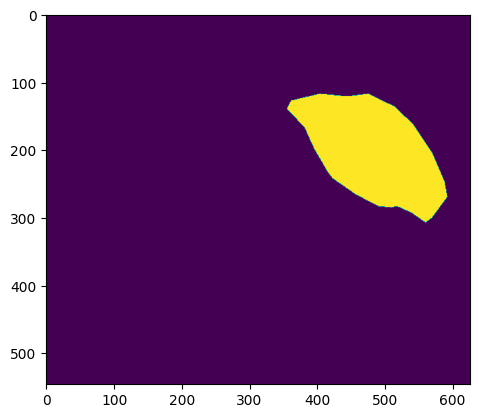

In [7]:
plt.imshow(grayscale_mask(mask_1))

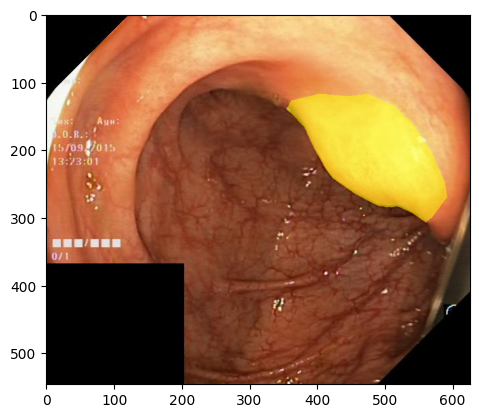

In [8]:
plt.imshow(mask_overlay(image_1, grayscale_mask(mask_1)))


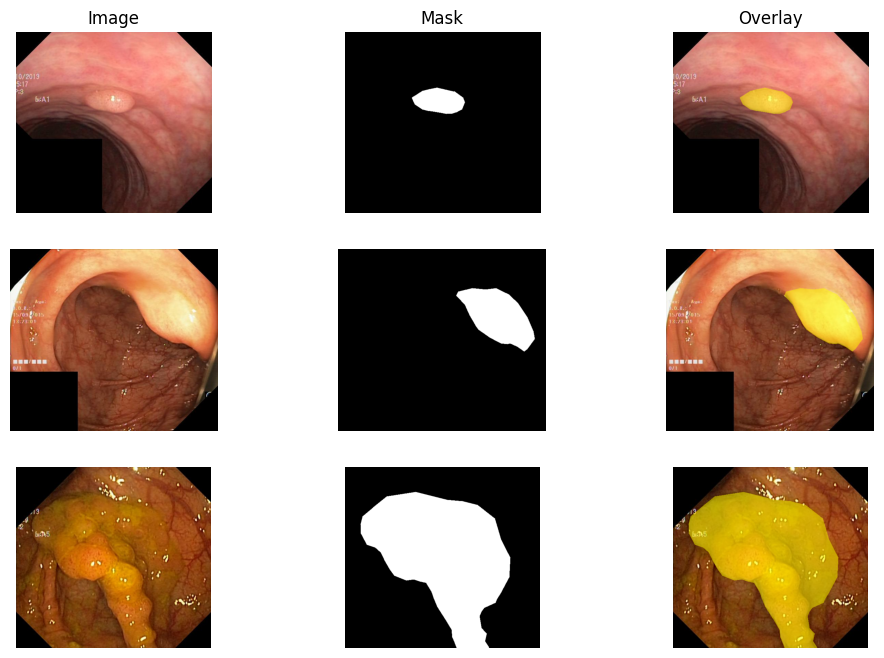

In [9]:
# Plot the dataset
fig, axs = plt.subplots(3, 3, figsize=(12, 8))
column_titles = ['Image', 'Mask', 'Overlay']

for i, ax in enumerate(axs[0]):
    ax.set_title(column_titles[i])
    
# Plot original, mask, overlay
axs[0, 0].imshow(image_0, cmap='gray')
axs[0, 0].axis('off')

axs[0, 1].imshow(grayscale_mask(mask_0), cmap='gray')
axs[0, 1].axis('off')

axs[0, 2].imshow(mask_overlay(image_0, grayscale_mask(mask_0)), cmap='gray')
axs[0, 2].axis('off')

axs[1, 0].imshow(image_1, cmap='gray')
axs[1, 0].axis('off')

axs[1, 1].imshow(grayscale_mask(mask_1), cmap='gray')
axs[1, 1].axis('off')

axs[1, 2].imshow(mask_overlay(image_1, grayscale_mask(mask_1)), cmap='gray')
axs[1, 2].axis('off')

axs[2, 0].imshow(image_2, cmap='gray')
axs[2, 0].axis('off')

axs[2, 1].imshow(grayscale_mask(mask_2), cmap='gray')
axs[2, 1].axis('off')

axs[2, 2].imshow(mask_overlay(image_2, grayscale_mask(mask_2)), cmap='gray')
axs[2, 2].axis('off')

plt.show()